<a href="https://colab.research.google.com/github/vallirajasekar/Image_Resolution/blob/main/Image_Resolution_Dhoni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance


In [2]:
def standardize_image(image, target_size):
    # Resize image to target size
    resized_image = cv2.resize(image, target_size)

    return resized_image


In [3]:
def clean_image(image):
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (3, 3), 0)

    # Convert image to grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding to binarize the image
    _, thresholded = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

    # Apply morphological operations to remove noise and fill gaps
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    cleaned_image = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel, iterations=3)

    return cleaned_image


In [14]:
input_image = cv2.imread('/content/Indian-cricketer-Mahendra-Singh-Dhoni-2011.webp')


In [15]:
# Define the target size for standardization
target_size = (1400, 2000)


In [16]:
!pip install opencv-python --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
# Standardize the input image
standardized_image = standardize_image(input_image, target_size)


In [18]:
# Clean the standardized image
cleaned_image = clean_image(standardized_image)


In [19]:
# Enhance the cleaned image using PIL
enhancer = ImageEnhance.Contrast(Image.fromarray(cleaned_image))
enhanced_image = enhancer.enhance(1.5)


In [20]:
# Convert the standardized image to PIL Image format
standardized_pil_image = Image.fromarray(cv2.cvtColor(standardized_image, cv2.COLOR_BGR2RGB))


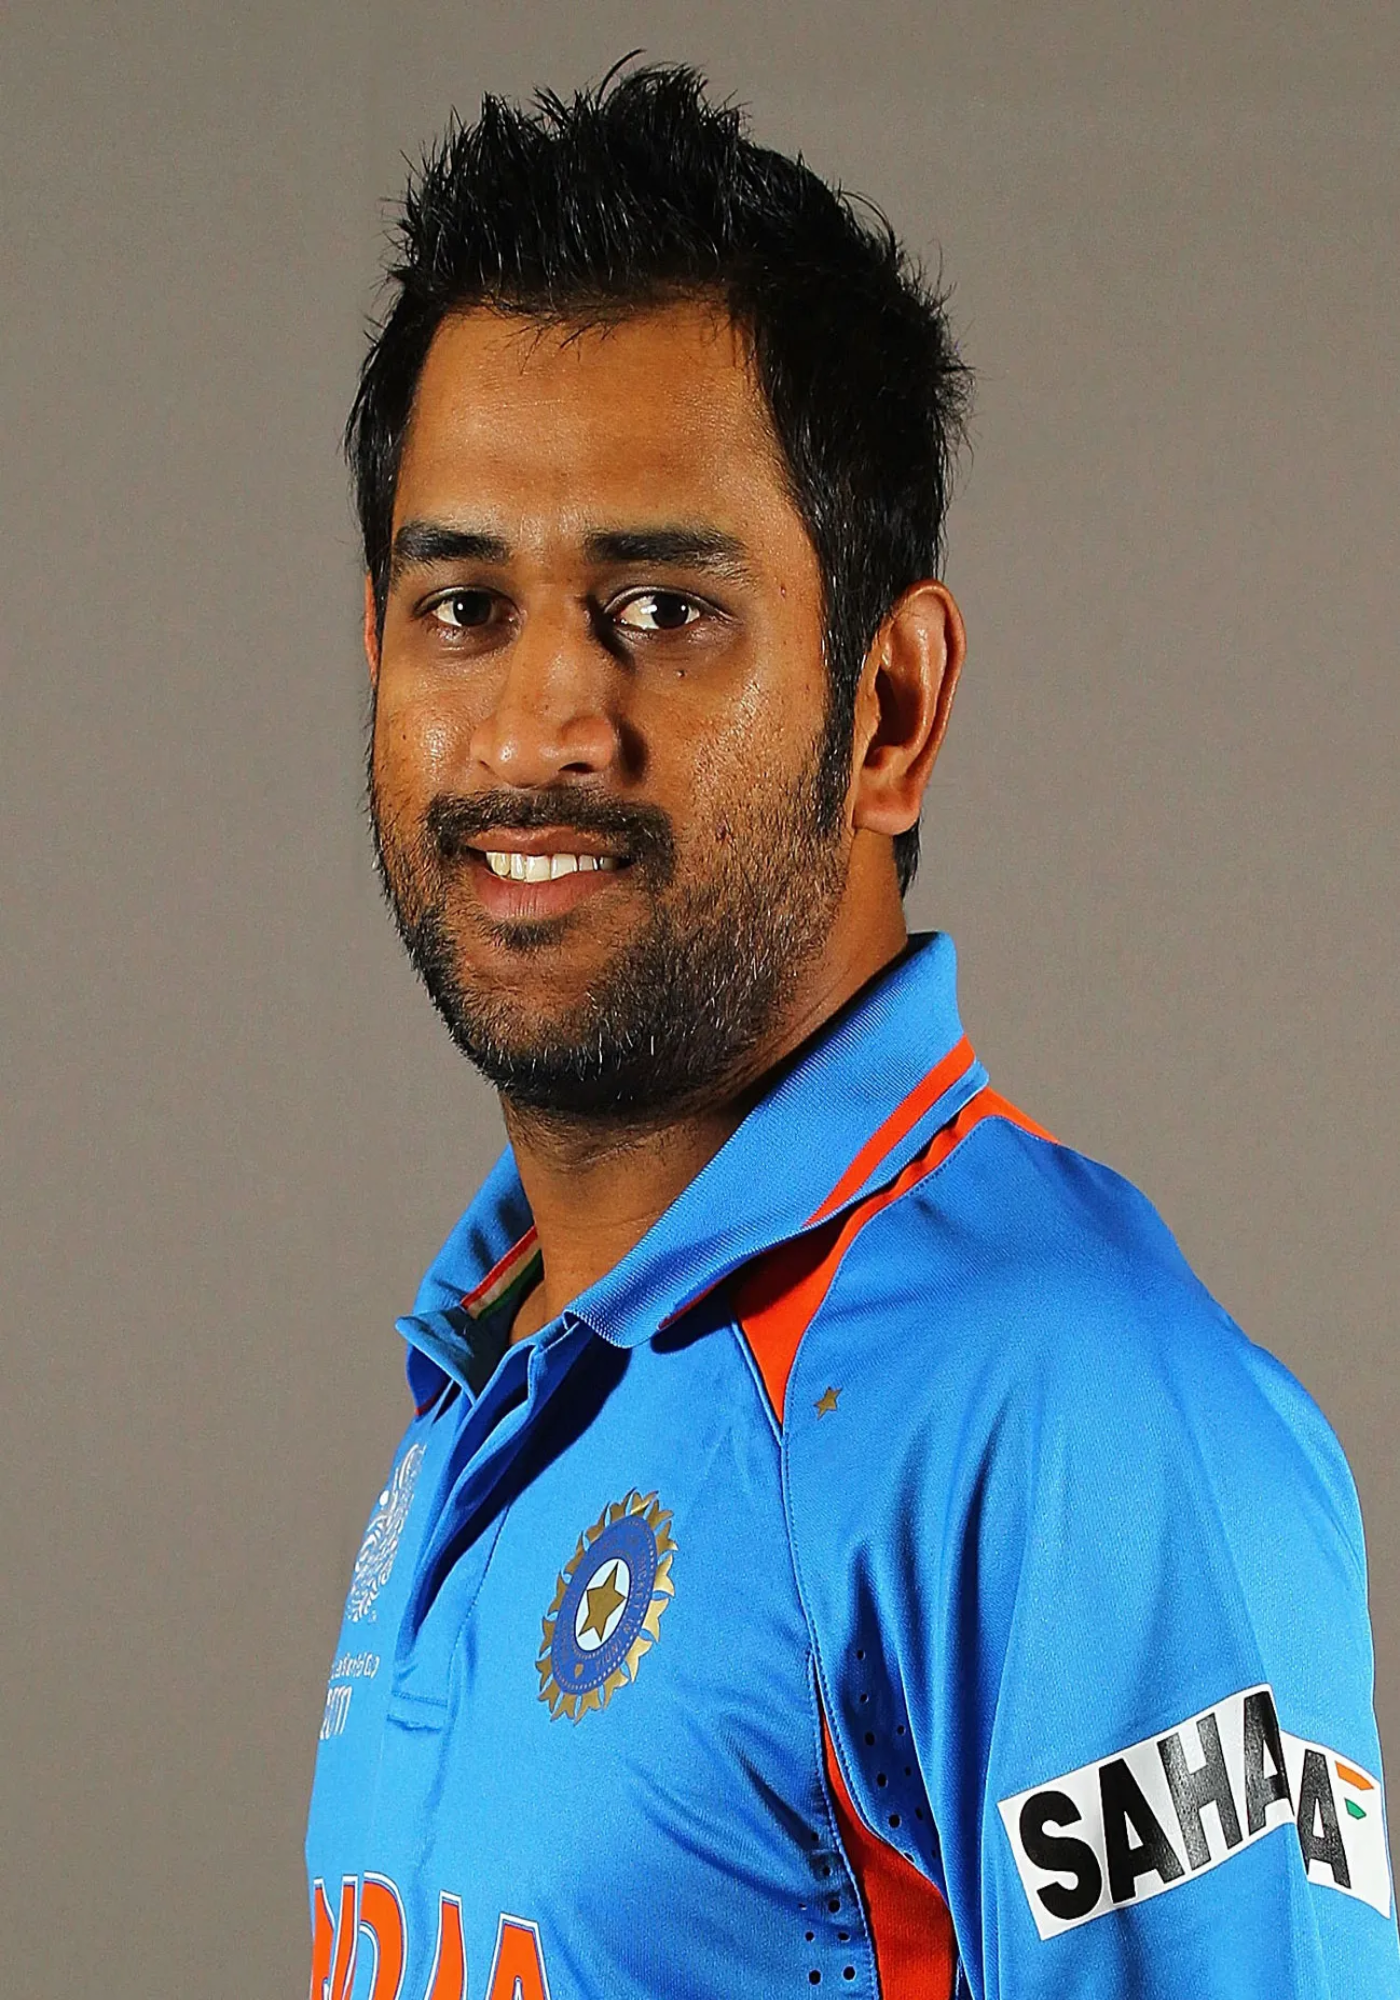

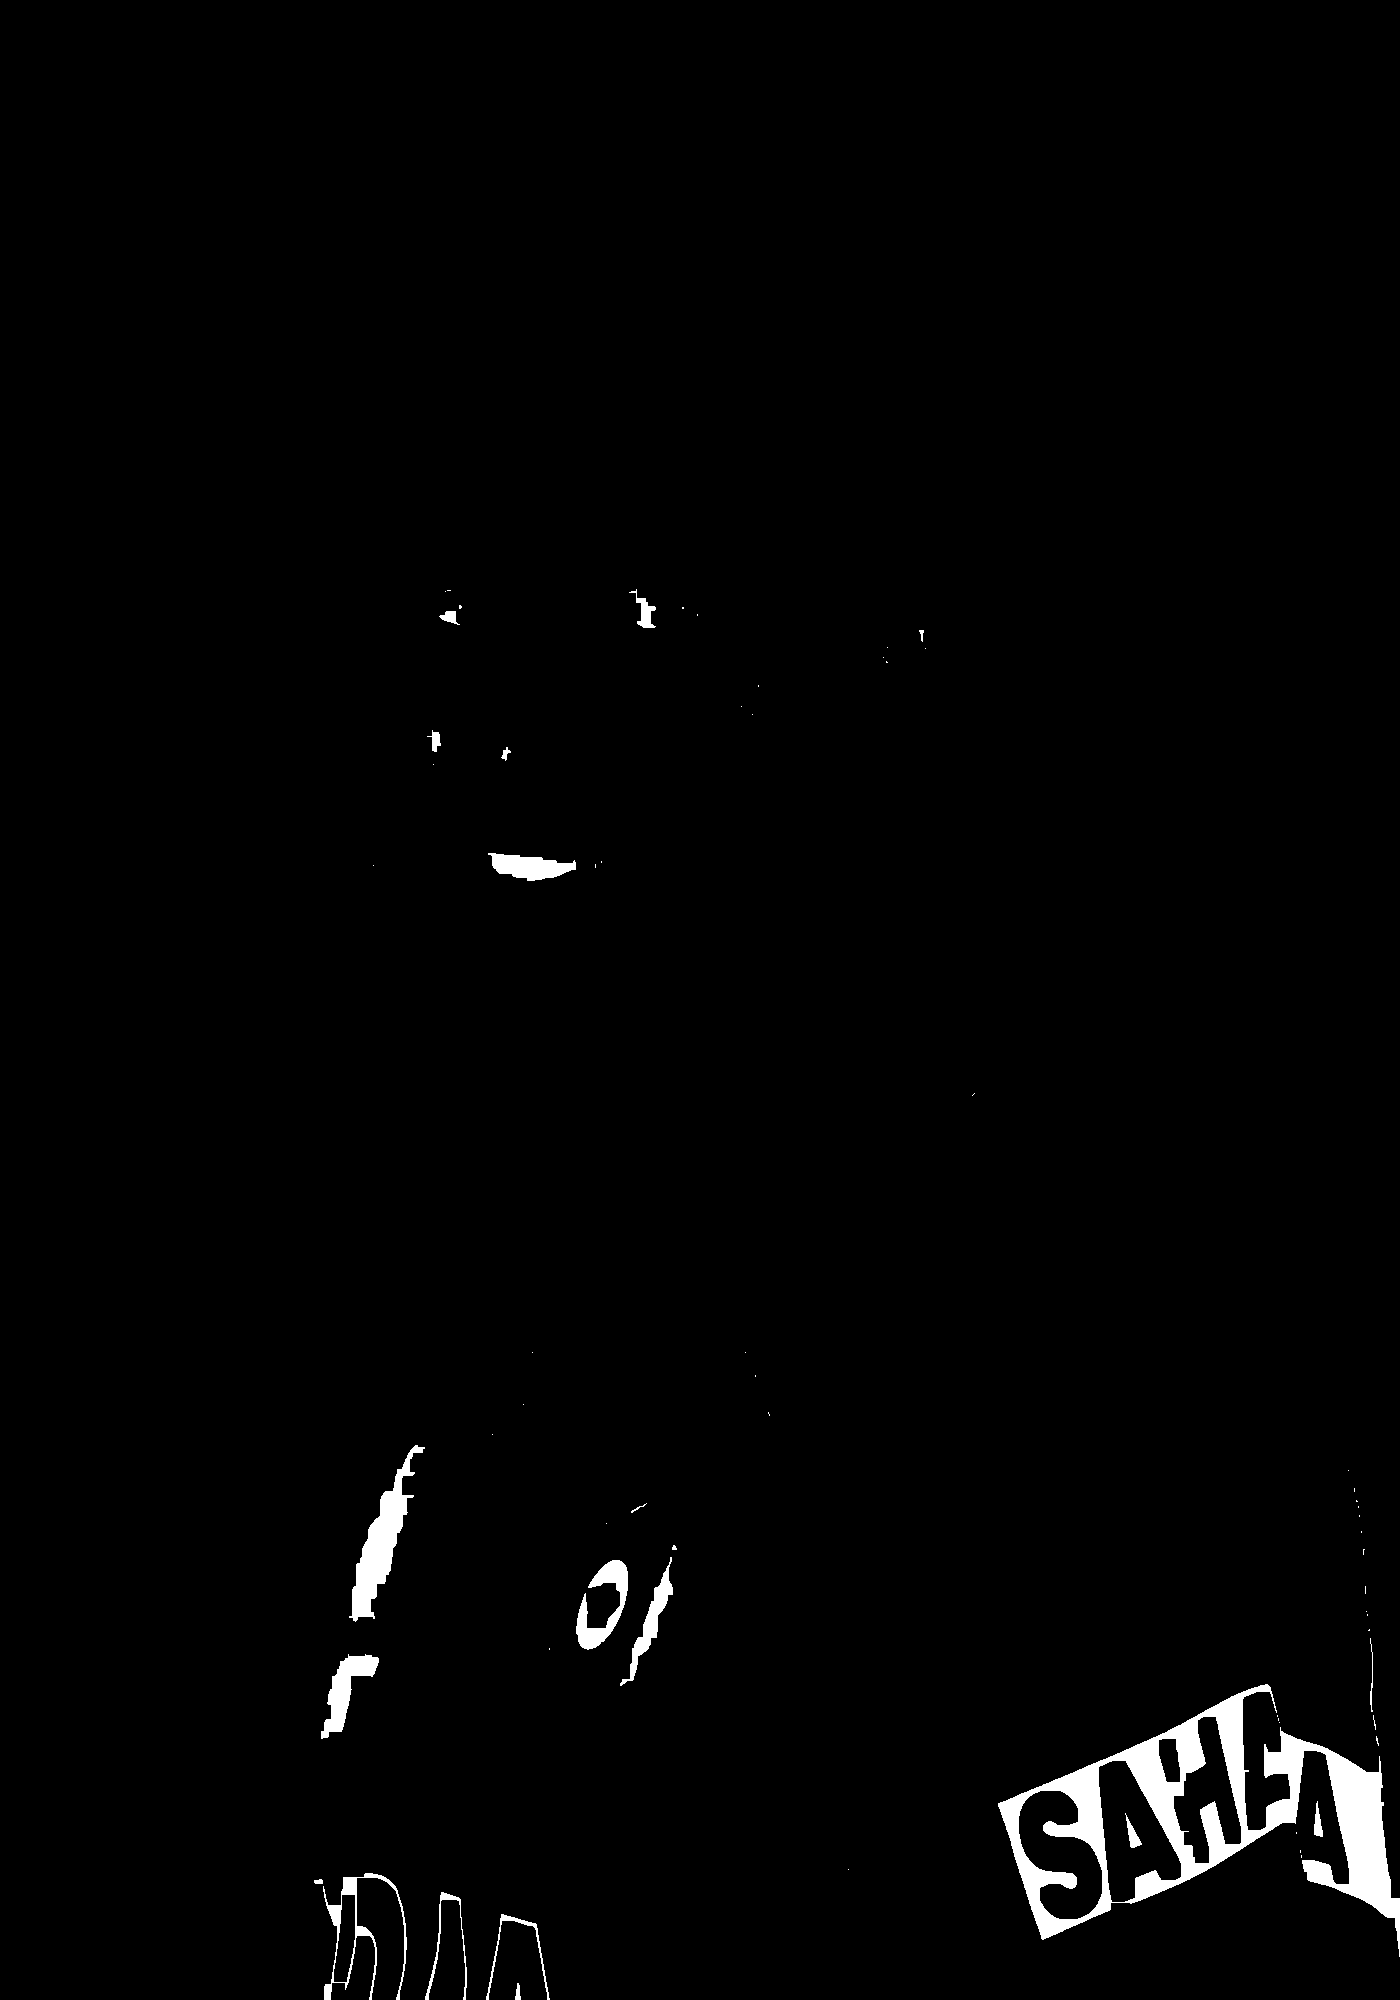

In [22]:
# Display the results
standardized_pil_image.show()
enhanced_image.show()
